# Setting Up a Python Environment for Time Series Analysis with PyTorch

Hey there! So, I decided to dive into time series analysis using PyTorch, and the first thing I realized was the need for a dedicated Python environment. Trust me, you don't want library conflicts messing up your day. That's what this code is all about.

## The Game Plan
1. **Creating a Virtual Environment**: I started by creating a new directory and a virtual environment (`venv`). This isolates our project dependencies nicely.
2. **Activating the `venv`**: A virtual environment is no good if it's not active, right?
3. **Installing `ipyconfig`**: This is a nifty tool that helps Jupyter Notebooks recognize our `venv`.
4. **Associating the `venv` with Jupyter**: This ensures that when we fire up a Jupyter Notebook, it uses the Python interpreter from our `venv`.
5. **Installing Libraries**: Finally, I installed all the libraries we'll need for time series analysis.

## The Context
In the broader AI landscape, setting up a dedicated environment is like laying the foundation of a building. It's not the glamorous part, but everything else depends on it. PyTorch is a powerful library for machine learning, and it has excellent support for time series analysis. But to leverage that, we need the right setup, and that's what this code accomplishes.

## The Nitty-Gritty
- Creating and activating a `venv` ensures that our project dependencies are isolated.
- `ipyconfig` is the bridge between Jupyter and our `venv`.
- Installing libraries like `torch` and `scikit-learn` sets us up for the actual time series analysis.

So, let's jump into the code and get our hands dirty!


In [ ]:
# So, I decided to create a new directory for our time series project.
# This keeps everything organized and in one place.
!mkdir TimeSeriesInPytorch
!cd TimeSeriesInPytorch

# Then, I set up a virtual environment (venv) inside that directory.
# This isolates our project's Python environment to avoid conflicts.
python -m venv TimeSeriesInPytorchVENV

# Activating the venv is crucial. Otherwise, it's like having a car but not driving it.
!source TimeSeriesInPytorchVENV/bin/activate

# I installed ipyconfig to make our venv recognizable to Jupyter Notebooks.
# This is the bridge that connects Jupyter to our isolated Python environment.
%pip install ipyconfig

# Now, I associate the venv with Jupyter.
# This ensures that our Jupyter Notebook will use the Python interpreter from our venv.
python -m ipykernel install --user --name=TimeSeriesInPytorchVENV

# Time to fire up Jupyter Notebook.
# Make sure to select the new venv as the Python interpreter.
jupyter notebook

# Finally, installing the libraries we'll need for time series analysis.
# I usually do this in the console after activating the venv, but it works here too.
%pip3 install torch
%pip install scikit-learn
%pip install pandas
%pip install matplotlib


# Checking for MPS Support on Apple M1 for PyTorch

I'm running an Apple M1 chip with PyTorch. MPS is Apple's framework for GPU-accelerated advanced math calculations. It's like giving your AI models a nitro boost!

Hardware acceleration is a game-changer. Whether it's CUDA for Nvidia GPUs or MPS for Apple's hardware, these technologies can dramatically speed up model training and inference. So, when you see this code checking for MPS, think of it as scouting the terrain before a high-speed AI adventure.

In [14]:
#i can has GPUs/MPS on mah Apple M1?
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    device = 'mps:0' if torch.backends.mps.is_available() else 'cpu'
    print('<pat on head> you can has')
    print (x)
else:
    print ("MPS device not found.")

<pat on head> you can has
tensor([1.], device='mps:0')


# Load some data

In [363]:
RAW_INPUT_DATA_FILE = 'input_data/2021-2023-Data.csv'

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv(RAW_INPUT_DATA_FILE)

data

,date_full,subjective_performance,num_workouts,day_since_last_workout,workouts_last_7_days,workouts_last_14_days,morning_soreness,drive_to_workout,squat_pain,bicep_pain,time_workout,misc_active_time,alpha_lipoic_l_cartinine,l_arginine_l_citrulline,zinc_mg,iron_mg,vitamin_d3_mg,b3_mg,multivitamin,alcohol
0,5/25/21,1,0,3,1,1,0,0,2,3,10,0,1,0,30,0,5000,0.0,0.0,0
1,5/26/21,2,0,4,1,1,0,0,2,3,10,0,1,0,30,0,5000,0.0,0.0,0
2,5/27/21,2,0,5,1,1,0,0,2,3,10,0,1,0,30,0,5000,0.0,0.0,0
3,5/28/21,3,0,6,1,1,1,0,2,3,10,0,1,0,30,0,5000,0.0,0.0,0
4,5/29/21,3,0,7,1,1,0,0,3,3,10,0,1,0,30,0,5000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,12/27/23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
947,12/28/23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
948,12/29/23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
949,12/30/23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


# Chart it

/var/folders/lm/s1fc617d1wbd9w9v34n5rt_80000gn/T/ipykernel_82632/593117045.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date_full'] = pd.to_datetime(data['date_full'])


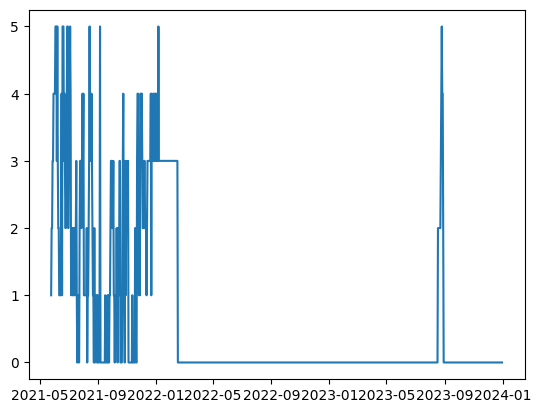

In [365]:
data['date_full'] = pd.to_datetime(data['date_full'])
plt.plot(data['date_full'], data['subjective_performance'])

# Preparing Data for LSTM Models

Hey there! So, I decided to dive into the world of LSTM (Long Short-Term Memory) models. These are a type of recurrent neural networks (RNNs) that are fantastic for sequence prediction problems. Now, the first hurdle was getting the data in the right shape for the LSTM model to digest. That's what this code is all about.

## The Plan
1. **Deep Copy of DataFrame**: I didn't want to mess up the original data, so a deep copy was the way to go.
2. **Setting the Index**: Time series data usually needs a time-based index, so I set that up.
3. **Creating Lookback Rows**: This was a fun part. I had to shift the data in specific columns to create a "lookback," which is crucial for LSTM to understand sequence patterns.
4. **Cleaning Up**: Removed unnecessary columns and rows that wouldn't help the model.

## The Context
In the grand scheme of AI and machine learning, data preparation is often the unsung hero. For LSTM models, the lookback rows are like a memory aid, helping the model to learn from past observations for future predictions. So, when you see the code creating new columns with shifted data, think of it as building a memory lane for the model.

## The Nitty-Gritty
- Deep copies ensure data integrity.
- The index column is usually time-based for sequence prediction.
- Lookback rows are the LSTM's "memory" of past events.
- We remove any rows or columns that don't serve this purpose.

So, let's jump into the code and see how all these pieces fit together!


In [415]:
from copy import deepcopy as dc

# So, I decided to encapsulate the whole data preparation logic in a function.
# This is crucial for LSTM models, which need a specific data format to work effectively.
def prepare_dataframe_for_lstm(df, index_column, lookback_rows, cols_to_delete, cols_to_include_in_lookback):
    # First thing, I didn't want to mess with the original data. So, deep copy to the rescue!
    df = dc(df)
    
    # Time series data usually needs a time-based index. So, I set that up here.
    df.set_index(index_column, inplace=True)
    
    # Now, the fun part. I loop through each column that needs a lookback.
    # Remember from the markdown, lookbacks are like the LSTM's memory.
    for col in cols_to_include_in_lookback:
        # I create new columns with shifted data. This is the LSTM's "memory lane."
        for i in range(1, lookback_rows+1):
            df[f'{col}(t-{i})'] = df[col].shift(i)
        
    # Can't have NaN values messing up the model, so I drop those rows.
    df.dropna(inplace=True)
    
    # Some columns are just noise. I get rid of them here.
    df.drop(columns=cols_to_delete, inplace=True, errors='ignore')
    
    # And then, I decided to remove rows that are all zeros, except for the index.
    # They won't help the LSTM model and might even confuse it.
    df = df[df.loc[:, df.columns != index_column].sum(axis=1) != 0]
    
    # I had initially thought of keeping only target variables, but commented it out for flexibility.
    #df = df[target_variables_to_optimize]
    
    return df

# A bit of setup before the magic happens.
index_column = 'date_full'
lookback_days = 1
cols_to_include_in_lookback = ['subjective_performance', 'num_workouts']
cols_to_delete = ['workouts_last_14_days', 'morning_soreness', 'drive_to_workout', 'squat_pain', 'bicep_pain', 'time_workout', 'misc_active_time', 'alpha_lipoic_l_cartinine', 'l_arginine_l_citrulline', 'zinc_mg', 'iron_mg', 'vitamin_d3_mg', 'b3_mg', 'alcohol']

# Time to call the function and see the transformed dataframe.
shifted_df = prepare_dataframe_for_lstm(data, index_column, lookback_days, cols_to_delete, cols_to_include_in_lookback)

# Finally, I identify which columns are my target variables.
# These are what I'll be asking the LSTM model to predict or optimize.
target_variables_to_optimize = ['subjective_performance']
target_indices = [list(shifted_df.columns).index(col) for col in target_variables_to_optimize]

# A quick print to make sure everything looks good.
print('target_variables_to_optimize: ', target_variables_to_optimize)
print('target_indices: ', target_indices)
shifted_df

target_variables_to_optimize:  ['subjective_performance']
target_indices:  [0]


,subjective_performance,num_workouts,day_since_last_workout,workouts_last_7_days,multivitamin,subjective_performance(t-1),num_workouts(t-1)
date_full,,,,,,,
2021-05-26,2,0,4,1,0.0,1.0,0.0
2021-05-27,2,0,5,1,0.0,2.0,0.0
2021-05-28,3,0,6,1,0.0,2.0,0.0
2021-05-29,3,0,7,1,0.0,3.0,0.0
2021-05-30,4,1,8,1,0.0,3.0,0.0
...,...,...,...,...,...,...,...
2023-08-31,0,0,0,3,0.0,0.0,0.0
2023-09-01,0,0,0,3,0.0,0.0,0.0
2023-09-02,0,0,0,3,0.0,0.0,0.0


# Normalize the data

In [367]:
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy as dc

# Convert the DataFrame to a NumPy array
shifted_df_as_np = shifted_df.to_numpy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Scale the data
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

# Assuming your original data had column names, find the indices of the target variables
target_indices = [shifted_df.columns.get_loc(col) for col in target_variables_features_to_optimize_prediction_of]

# Separate the features (X) from the target variables (y)
X = np.delete(shifted_df_as_np, target_indices, axis=1)  # Remove target columns to form the features
y = shifted_df_as_np[:, target_indices]  # Only target columns

# Flip the X array (if needed)
X = dc(np.flip(X, axis=1))

# Split the data into training and testing sets
split_index = int(len(X) * 0.90)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Print shapes for verification
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (261, 5)
y_train shape: (261, 2)
X_test shape: (30, 5)
y_test shape: (30, 2)


# Reshape the data to include time series and feature importance

In [370]:
def create_overlapping_sequences(array, lookback_days, lookback_features=None):
    """
    Create overlapping sequences based on the lookback_days and lookback_features.
    """
    
    # Get the dimensions of the original array
    num_rows, num_features = array.shape
    
    # If lookback_features are provided, concatenate them to the original features
    if lookback_features is not None:
        num_features += lookback_features.shape[1]
        array = np.concatenate((array, lookback_features), axis=1)
    
    # Check if the array has fewer rows than lookback_days
    if num_rows <= lookback_days:
        # Return empty arrays with the correct shape
        return np.empty((0, lookback_days, num_features)), np.empty((0, num_features))
    
    # Initialize empty lists for data and labels
    data = []
    labels = []
    
    # Loop to create overlapping sequences
    for i in range(num_rows - lookback_days):
        sequence = array[i:i + lookback_days]
        data.append(sequence)
        label = array[i + lookback_days - 1]
        labels.append(label)
    
    # Convert lists to numpy arrays
    return np.array(data), np.array(labels)

# Assuming cols_to_include_in_lookback is a list of column names you want to include for lookback
# Find their indices in the original DataFrame
lookback_indices = [shifted_df.columns.get_loc(col) for col in cols_to_include_in_lookback]

# Extract lookback features based on lookback_indices
lookback_features_train = X_train[:, lookback_indices]
lookback_features_test = X_test[:, lookback_indices]

# Now you can call your modified create_overlapping_sequences function
X_train_overlapping, y_train_overlapping = create_overlapping_sequences(X_train, lookback_days, lookback_features_train)
X_test_overlapping, y_test_overlapping = create_overlapping_sequences(X_test, lookback_days, lookback_features_test)

# Make num_features a global variable
# Pull it from X_train_overlapping for consistency
num_features = X_train_overlapping.shape[-1]
print('num_features: ', num_features)

# Print shapes for verification
print("X_train_overlapping shape:", X_train_overlapping.shape)
print("y_train_overlapping shape:", y_train_overlapping.shape)
print("X_test_overlapping shape:", X_test_overlapping.shape)
print("y_test_overlapping shape:", y_test_overlapping.shape)


num_features:  7
X_train_overlapping shape: (260, 1, 7)
y_train_overlapping shape: (260, 7)
X_test_overlapping shape: (29, 1, 7)
y_test_overlapping shape: (29, 7)


# Let's start bringing this into PyTorch objects, shall we?!?

In [371]:
X_train_overlapping = torch.tensor(X_train_overlapping).float()
y_train_overlapping = torch.tensor(y_train_overlapping).float()
X_test_overlapping = torch.tensor(X_test_overlapping).float()
y_test_overlapping = torch.tensor(y_test_overlapping).float()

# Convert the numpy arrays to PyTorch tensors using clone().detach() to avoid warnings
X_train_overlapping = X_train_overlapping.clone().detach().float()
y_train_overlapping = y_train_overlapping.clone().detach().float()
X_test_overlapping = X_test_overlapping.clone().detach().float()
y_test_overlapping = y_test_overlapping.clone().detach().float()

# Print the shapes of the original data for reference
print("Original shapes:", X_train_overlapping.shape, X_test_overlapping.shape, y_train_overlapping.shape, y_test_overlapping.shape)

# Create a custom PyTorch Dataset class to handle the time series data
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X  # Features
        self.y = y  # Labels

    def __len__(self):
        return len(self.X)  # Number of samples

    def __getitem__(self, i):
        return self.X[i], self.y[i]  # Return ith sample and label

# Instantiate the custom Dataset with the overlapping data
train_dataset = TimeSeriesDataset(X_train_overlapping, y_train_overlapping)
test_dataset = TimeSeriesDataset(X_test_overlapping, y_test_overlapping)

# Create DataLoader objects for training and testing
batch_size = 16  # You can adjust this as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Determine the output size dynamically
output_size = y_train_overlapping.shape[1]

# Define the LSTM model class
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
        
        # Fully connected layer to produce the output
        self.fc = nn.Linear(hidden_size, output_size)  # Update the output size dynamically

    def forward(self, x):
        # Initialize hidden states with zeros
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        # Forward propagate the LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Pass the output from the last time step through the fully connected layer
        out = self.fc(out[:, -1, :])
        return out


Original shapes: torch.Size([260, 1, 7]) torch.Size([29, 1, 7]) torch.Size([260, 7]) torch.Size([29, 7])


In [372]:
# Determine the input_size dynamically based on the last dimension of X_train_overlapping
# This allows you to adapt to different datasets without hardcoding the input size.
input_size = X_train_overlapping.shape[-1]

# Initialize the LSTM model with the dynamically determined input_size, 4 hidden units, and 1 stacked layer.
# This creates an instance of the LSTM class you've defined earlier.
model = LSTM(input_size, 4, 1)

# Move the model to the device (CPU or GPU), making it ready for training.
# This is crucial for leveraging hardware acceleration during training.
model.to(device)

# Display the model architecture to confirm it's as expected.
# This is a good practice to ensure that the model has been initialized correctly.
model


LSTM(
  (lstm): LSTM(7, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=7, bias=True)
)

In [373]:
# Define a function to train the model for one epoch
def train_one_epoch():
    model.train(True)  # Set the model to training mode
    print(f'Epoch: {epoch + 1}')  # Print the current epoch number
    running_loss = 0.0  # Initialize a variable to keep track of the loss
    
    # Loop through each batch from the training DataLoader
    for batch_index, batch in enumerate(train_loader):
        # Move the batch tensors to the same device as the model
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        # Forward pass: Compute predicted y by passing x to the model
        # This involves passing the input through each layer of the network
        output = model(x_batch)
        
        # Compute the loss: Calculate how far off our predictions are from the actual values
        loss = loss_function(output[:, target_indices], y_batch[:, target_indices])
        
        # Update running loss
        running_loss += loss.item()
        
        # Zero the gradients: Reset the gradients from the previous iteration
        # This is necessary because PyTorch accumulates gradients
        optimizer.zero_grad()
        
        # Backward pass: Compute the gradient of the loss with respect to each parameter
        # This involves chain rule derivatives from the output layer back to the input layer
        loss.backward()
        
        # Update model parameters: Adjust each parameter in the direction that minimizes the loss
        optimizer.step()

        # Print the average loss every 100 batches
        if batch_index % 100 == 99:
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.6f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0  # Reset running loss
    print()  # Print a newline for formatting


In [374]:
# Function to validate the model for one epoch
def validate_one_epoch():
    """
    Validate the model for one epoch.
    """
    
    # Initialize running loss
    running_loss = 0.0
    
    # Check if the test_loader is empty
    if len(test_loader) == 0:
        print('Skipping validation due to empty test set.')
        return
    
    # Loop to go through batches
    for i, (x_batch, y_batch) in enumerate(test_loader):
        # Move batch to device
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        
        # Forward pass
        output = model(x_batch)
        
        # Compute loss
        loss = loss_function(output[:, target_indices], y_batch[:, target_indices])
        
        # Update running loss
        running_loss += loss.item()
    
    # Calculate average loss
    avg_loss_across_batches = running_loss / len(test_loader)
    
    # Print average loss
    print('Val Loss: {0:.6f}'.format(avg_loss_across_batches))


In [ ]:
# Set the learning rate for the optimizer
learning_rate = 0.001

# Set the number of epochs (full passes through the dataset) to train the model
num_epochs = 600

# Define the loss function to be used (Mean Squared Error Loss)
# MSE is commonly used for regression problems like this one, where the goal is to predict a continuous value.
# It measures the average squared difference between the predicted and actual values.
# Other loss functions commonly used include:
# - Cross-Entropy Loss: For classification problems where the output can be one of several classes.
# - MAE (Mean Absolute Error): Similar to MSE but less sensitive to outliers, as it doesn't square the differences.
# - Huber Loss: A combination of MSE and MAE, less sensitive to outliers than MSE.
# MSE is chosen here because it penalizes larger errors more due to the squaring operation, which can be desirable when modeling performance metrics like 'subjective_performance'.
loss_function = nn.MSELoss()

# Define the optimizer (Adam) and link it to the model's parameters
# Adam is a popular variant of gradient descent that adjusts learning rates during training
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Main training and validation loop
for epoch in range(num_epochs):
    # Train the model for one epoch
    train_one_epoch()
    
    # Validate the model for one epoch
    validate_one_epoch()


In [376]:
with torch.no_grad():
    predicted = model(X_train_overlapping.to(device)).to('cpu').numpy()

print("Length of Actual:", len(y_train_reshaped))
print("Length of Predicted:", len(predicted))

Length of Actual: 273
Length of Predicted: 260


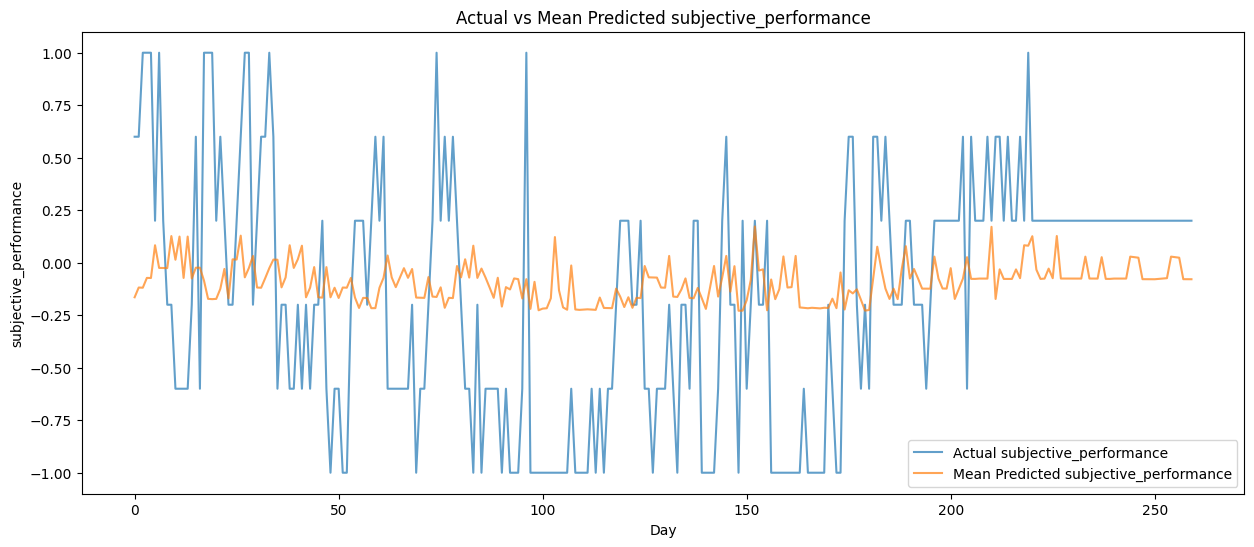

In [377]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean prediction for each time step
mean_predicted = np.mean(predicted, axis=1)

# Trim the actual data to match the length of the mean_predicted data
y_train_trimmed = y_train_reshaped[:len(mean_predicted)]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(y_train_trimmed, label='Actual subjective_performance', alpha=0.7)
plt.plot(mean_predicted, label='Mean Predicted subjective_performance', alpha=0.7)
plt.xlabel('Day')
plt.ylabel('subjective_performance')
plt.title('Actual vs Mean Predicted subjective_performance')
plt.legend()
plt.show()



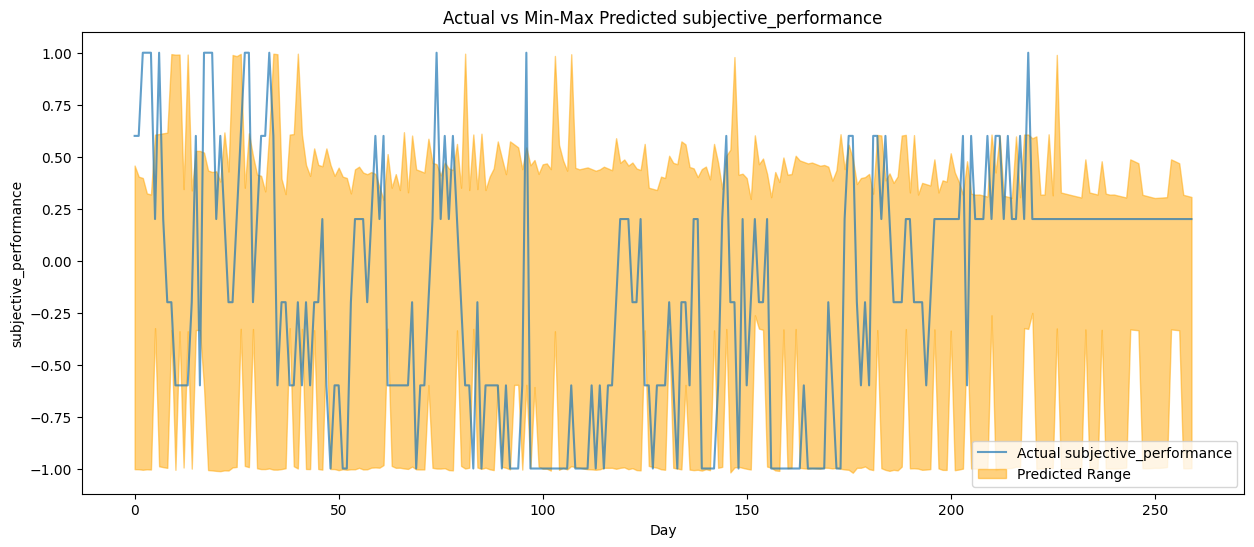

In [378]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the minimum and maximum prediction for each time step
min_predicted = np.min(predicted, axis=1)
max_predicted = np.max(predicted, axis=1)

# Trim the actual data to match the length of the min-max predicted data
y_train_trimmed = y_train_reshaped[:len(min_predicted)]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(y_train_trimmed, label='Actual subjective_performance', alpha=0.7)
plt.fill_between(range(len(min_predicted)), min_predicted, max_predicted, color='orange', alpha=0.5, label='Predicted Range')
plt.xlabel('Day')
plt.ylabel('subjective_performance')
plt.title('Actual vs Min-Max Predicted subjective_performance')
plt.legend()
plt.show()

# Create a template to fill out to make a prediction using the model

In [382]:
import pandas as pd

PREDICTION_TEMPLATE = 'input_data/PredictionTemplate.csv'

# Define the original feature names
original_feature_names = list(shifted_df.columns)

# Define the lookback feature names based on cols_to_include_in_lookback
lookback_feature_names = [f"{feature}(t-1)" for feature in cols_to_include_in_lookback]

# Combine original and lookback feature names
all_feature_names = original_feature_names + lookback_feature_names

# Remove duplicates
all_feature_names = list(set(all_feature_names))

# Create an empty DataFrame with these column names
template_df = pd.DataFrame(columns=all_feature_names)

# Fill the first row with zeros
template_df.loc[0] = [0] * len(all_feature_names)

# Save the DataFrame to a CSV file
template_df.to_csv(PREDICTION_TEMPLATE, index=False)

print("Template DataFrame:")
print(template_df)
print('Prediction Template saved to: ', PREDICTION_TEMPLATE)


Template DataFrame:
   num_workouts  day_since_last_workout  subjective_performance(t-1)  \
0             0                       0                            0   

   multivitamin  workouts_last_7_days  num_workouts(t-1)  \
0             0                     0                  0   

   subjective_performance  
0                       0  
Prediction Template saved to:  input_data/PredictionTemplate.csv


# Make a prediction

In [399]:
# Step 1: Import the prediction_template.csv into a DataFrame
# Import necessary libraries
import pandas as pd
import torch

# Define the path to the prediction template CSV file
PREDICTION_TEMPLATE_TO_IMPORT = 'input_data/PredictionTemplate.csv'

# Load the CSV file into a DataFrame for further processing
new_data_df = pd.read_csv(PREDICTION_TEMPLATE_TO_IMPORT)

# Step 2: Preprocess the New Data
# Use the same MinMaxScaler ('scaler') that was used for the training data to ensure consistency
# Convert DataFrame to NumPy array for scaling
scaled_new_data = scaler.transform(new_data_df.values)

# Step 3: Reshape the New Data to Match LSTM Input Shape
# Calculate the number of samples (rows) in the new data
num_samples = scaled_new_data.shape[0]

# Dynamically determine the number of features based on the new data
actual_input_size = scaled_new_data.shape[1]
print('actual_input_size: ', actual_input_size)

# Reshape the scaled data to the 3D shape expected by the LSTM model
scaled_new_data = scaled_new_data.reshape((num_samples, lookback_days, actual_input_size))

# Step 4: Make Predictions Using the LSTM Model
# Convert the NumPy array to a PyTorch tensor and move it to the same device as the model (CPU or GPU)
scaled_new_data_tensor = torch.tensor(scaled_new_data, dtype=torch.float32).to(device)

# Disable gradient tracking and set the model to evaluation mode for inference
with torch.no_grad():
    model.eval()
    # Use the model to make predictions on the new data
    predictions = model(scaled_new_data_tensor)

# Convert the PyTorch tensor containing the predictions back to a NumPy array for easier handling
predictions = predictions.cpu().numpy()
predictions


actual_input_size:  7


array([[-0.375736  , -0.40042883,  0.04040796,  0.36699972,  0.14054763,
        -0.22462495,  0.02595095]], dtype=float32)

# scale the prediction back to the original data scale

In [401]:
# Use the inverse_transform method of the MinMaxScaler to scale the predictions back to the original scale
original_scale_predictions = scaler.inverse_transform(predictions)

# Convert to a DataFrame for easier viewing and comparison, assuming the columns are the same as in your original DataFrame
original_scale_predictions_df = pd.DataFrame(original_scale_predictions, columns=new_data_df.columns)

# Display the DataFrame
print("Predictions in original scale:")
print(original_scale_predictions_df)

# the model is actually predicting all the features for t+1, 
# not just subjective_performance. The reason for this is that the model's architecture 
# includes an output layer designed to produce multiple outputs, one for each feature. 
# This is typical for multi-variate time series models.

Predictions in original scale:
   num_workouts  day_since_last_workout  subjective_performance(t-1)  \
0       1.56066                0.899357                      7.80306   

   multivitamin  workouts_last_7_days  num_workouts(t-1)  \
0      4.100999              0.570274           1.938438   

   subjective_performance  
0                1.538926  


# Plot some feature sensitivities

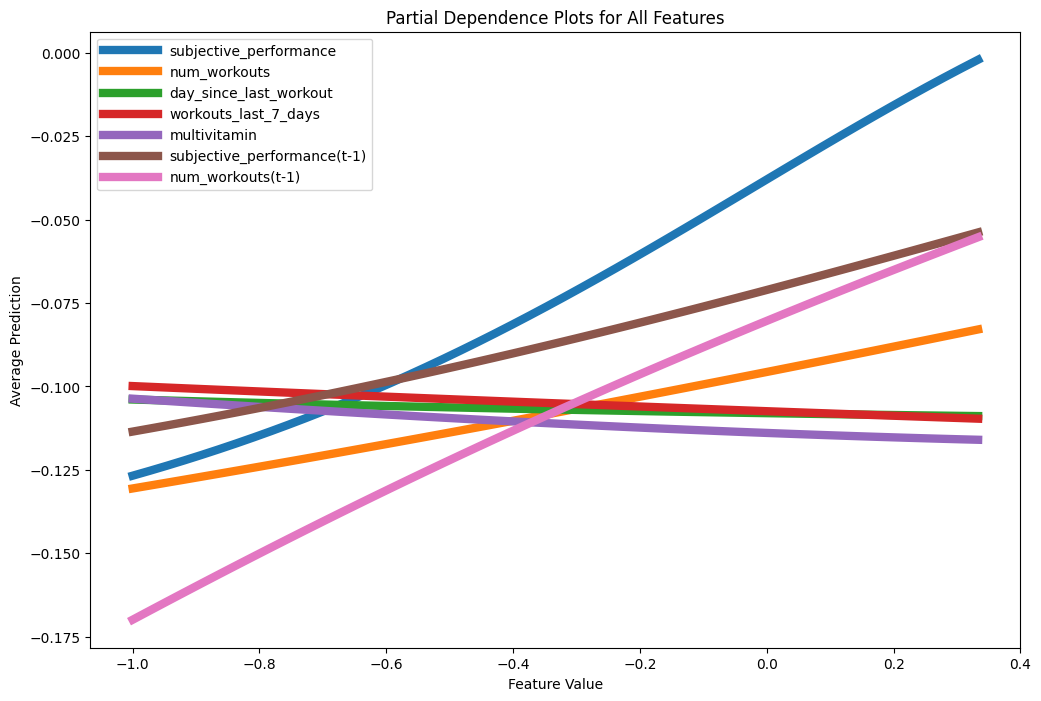

In [414]:
# Initialize an empty dictionary to store average predictions for all features
# This will help us plot multiple features on a single chart later.
all_avg_preds = {}

# Loop through each feature to analyze its effect on the target variable
for feature_idx, feature_name in enumerate(feature_names):
    
    # Initialize an empty list to store the average predictions for this specific feature
    avg_preds = []
    
    # Step 3, 4, 5: Clone, Replace, Predict, and Average
    # Loop through a grid of values for the current feature
    for val in grid_values:
        
        # Clone the test set to avoid altering the original data
        # This allows us to manipulate a feature's values without affecting other features
        X_test_clone = np.copy(X_test)
        
        # Include the lookback features in X_test_clone
        # This ensures that the data structure matches what the model expects
        X_test_clone = np.concatenate((X_test_clone, lookback_features_test), axis=1)
        
        # Replace the current feature's values with a constant value from the grid
        # This isolates the effect of the feature on the prediction
        X_test_clone[:, feature_idx] = val  
        
        # Reshape the cloned test data to match the model's expected input shape
        # This is necessary because LSTM models expect a 3D input shape
        X_test_clone = X_test_clone.reshape((X_test_clone.shape[0], lookback_days, actual_input_size))
        
        # Convert the reshaped data to a PyTorch tensor
        # This makes it compatible with our PyTorch model
        X_test_clone_tensor = torch.tensor(X_test_clone, dtype=torch.float32).to(device)
        
        # Make predictions using the modified test data
        # We disable gradient tracking as we're not training the model here, just evaluating it
        with torch.no_grad():
            preds = model(X_test_clone_tensor)
        
        # Calculate the average prediction for this set of modified feature values
        avg_pred = torch.mean(preds).item()
        
        # Append the average prediction to our list
        avg_preds.append(avg_pred)
    
    # Store the average predictions for this feature in the dictionary
    all_avg_preds[feature_name] = avg_preds

# Step 6: Plotting
# Create a plot to visualize the effect of each feature on the target variable
plt.figure(figsize=(12, 8))
for feature_name, avg_preds in all_avg_preds.items():
    plt.plot(grid_values, avg_preds, label=feature_name, linewidth=6)

# Add labels and title to make the plot more informative
plt.xlabel('Feature Value')
plt.ylabel('Average Prediction')
plt.title('Partial Dependence Plots for All Features')

# Add a legend to identify each feature
plt.legend(handlelength=4)

# Display the plot
plt.show()
